<a href="https://colab.research.google.com/github/kumiori/mec647/blob/main/mec647_intro_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import sys

try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl  # noqa: F401
    import dolfinx  # noqa: F401
else:
    try:
        import ufl
        import dolfinx
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenicsx-install.sh" -O "/tmp/fenicsx-install.sh" && bash "/tmp/fenicsx-install.sh";
        import ufl  # noqa: F401
        import dolfinx  # noqa: F401

try:
    import pyvista
except ImportError:
    !{sys.executable} -m pip install --upgrade pyvista itkwidgets;
    import pyvista  # noqa: F401
    from pyvista.utilities import xvfb

try:
    import gmsh
except ImportError:
    !{sys.executable} -m pip install gmsh
    import gmsh

!sudo apt install libgl1-mesa-glx xvfb;
!{sys.executable} -m pip install pythreejs;
!{sys.executable} -m pip install ipygany;
!{sys.executable} -m pip install --upgrade PyYAML

In [ ]:
  print(dolfinx.__version__)

0.3.1.0


In [ ]:
import dolfinx
print(f"DOLFINx version: {dolfinx.__version__} based on GIT commit: {dolfinx.git_commit_hash} of https://github.com/FEniCS/dolfinx/")

DOLFINx version: 0.3.1.0 based on GIT commit: 3a113a8854b14649a70127cae6455f2588e8be31 of https://github.com/FEniCS/dolfinx/


In [ ]:
import mpi4py
import mpi4py.MPI


In [ ]:
import dolfinx.fem
import dolfinx.mesh
from dolfinx.mesh import CellType

from mpi4py import MPI

import numpy as np

In [ ]:
mesh = dolfinx.mesh.create_rectangle?

In [ ]:
mesh = dolfinx.mesh.create_rectangle(
  MPI.COMM_WORLD,
  ((0., 0.), (1., .1)),
  (10, 5),
  cell_type=CellType.triangle
  )

In [ ]:
V = dolfinx.fem.functionspace(mesh, ("CG", 1))

In [ ]:
import ufl 
u = ufl.TrialFunction(V)
v = ufl.TestFunction(V)

In [ ]:
dx = ufl.dx

In [ ]:
f = dolfinx.fem.Function(V)
dim_V = f.vector.local_size
# dim_V = ?
f.vector[:] = np.arange(1, dim_V + 1)

In [ ]:

import dolfinx.plot
from dolfinx.plot import create_vtk_topology
from IPython.display import Image, display
import pyvista
from pyvista.utilities import xvfb

topology, cell_types = create_vtk_topology(mesh, mesh.topology.dim)

# pyvista.set_jupyter_backend("pythreejs")


In [ ]:
grid = pyvista.UnstructuredGrid(topology, cell_types, mesh.geometry.x)
grid.point_data["f"] = f.compute_point_values().real
grid.set_active_scalars("f")

xvfb.start_xvfb(wait=0.05)
pyvista.OFF_SCREEN = True



In [ ]:
topology, cell_types = dolfinx.plot.create_vtk_topology(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, mesh.geometry.x)

plotter = pyvista.Plotter()

grid = pyvista.UnstructuredGrid(topology, cell_types, mesh.geometry.x)
grid.point_data["f"] = f.compute_point_values().real
grid.set_active_scalars("f")

plotter.add_mesh(grid, show_edges=True)
plotter.view_xy()
if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    pyvista.start_xvfb()
    figure = plotter.screenshot("bar_f.png")

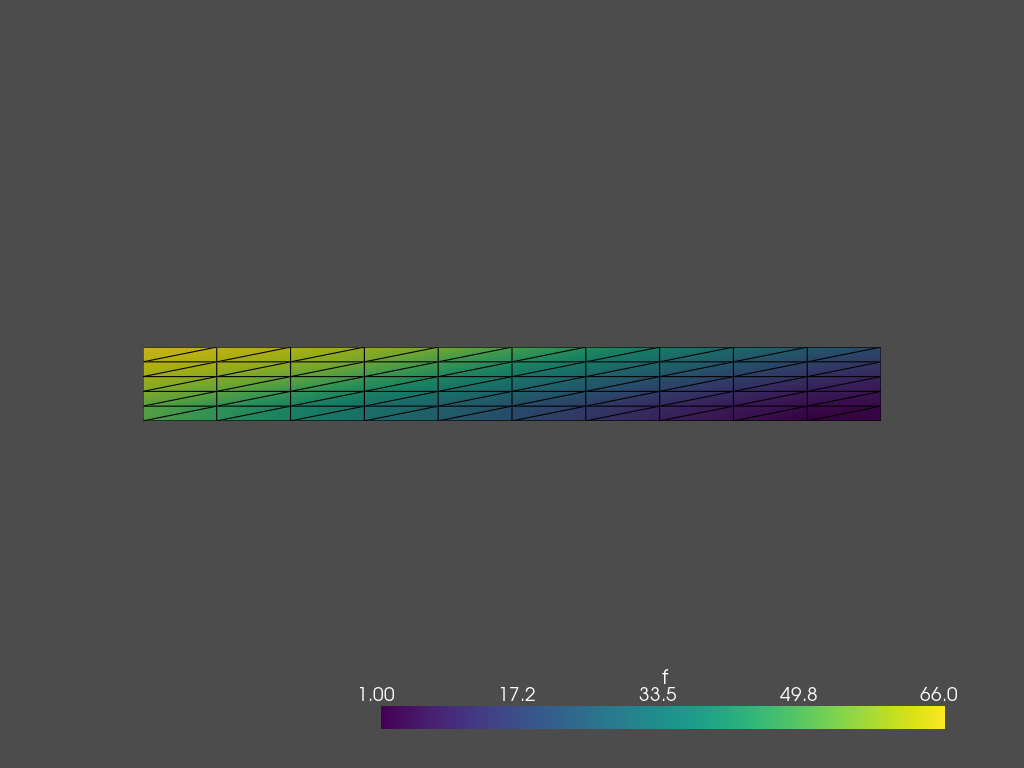

In [ ]:
display(Image(filename="bar_f.png"))